# Tổng hợp dữ liệu

## Mục Tiêu: 
### Tiến hành tổng hợp dữ liệu đầu vào từ các nguồn Web, Book, Kaggle, Git và tổng hợp, xử lý tam thời tạo ra 3 file dữ liệu dưới dạng csv, dành cho ba mục tiêu bao gồm : 
### - Cho sinh ngôn ngữ
### - Cho trả lời câu hỏi
### - Cho phân cụm.
 

# Library

In [1]:
import sys
sys.path.append('../1. Take Data')

In [2]:
import os
import string
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import words

nltk.download('words')
word_list = set(words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


# Dữ liệu cho bài toán sinh ngôn ngữ ?

In [3]:
!ls

Data_Book
Data_Kaggle
Data_Web
Question_Answer.csv
Sequence_Text.csv
Sequence_Text_temp.csv
Take_Data_From_Book.py
Take_Data_Web.py
TongHop.ipynb
frequency_dictionary_en_82_765.txt


## 1.1 Load Data

## Data Web

In [4]:
web_files = os.listdir('Data_Web')

In [5]:
context_web = ""
for i in web_files:
    with open('Data_Web/'+i,'r', encoding='latin-1') as f:
        context_web+=f.read()

In [6]:
len(context_web)

83533

## Data Book

In [7]:
book_files = os.listdir('Data_Book')

In [8]:
context_book = ""
for i in book_files:
    if '.txt' in i:
        with open('Data_Book/'+i,'r', encoding='latin-1') as f:
            context_book+=f.read()

In [9]:
len(context_book)

2560895

## 2. Pre-Processing

In [10]:
content = context_web + '.' + context_book

In [11]:
len(content)

2644429

In [12]:
def preprocess_text(text):
    # Substitute matched punctuation with an empty string
    cleaned_text = text.replace(',','')
    cleaned_text = cleaned_text.replace("”","").replace("“","").replace("’","").replace("\x92","")
    # Loại bỏ các @mentions
    cleaned_text = re.sub(r'@\w+', '', cleaned_text)
    # Loại bỏ các ký hiệu không phải chữ cái, số hoặc khoảng trắng
    cleaned_text = re.sub(r'[^A-Za-z\.\s]', '', cleaned_text)
    # Loại bỏ các liên kết hyper-link
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text)
    # Loại bỏ dấu hai chấm theo sau bởi một hoặc nhiều khoảng trắng
    cleaned_text = re.sub(r':[\s]+', ' ', cleaned_text)
    #
    cleaned_text = cleaned_text.replace('\n',' ')
    #
    cleaned_text = cleaned_text.replace('\t',' ')
    # Loại bỏ khoảng trắng thừa
    cleaned_text = cleaned_text.strip()
    return cleaned_text

In [13]:
content = preprocess_text(content)

In [14]:
len(content.split('.'))

28078

In [15]:
# Tao ra danh sach cac cau:
seqs = content.split('.')

In [16]:
len(seqs)

28078

In [17]:
seqs[:10]

['MIN READ NASAs TESS Finds Intriguing World Sized Between Earth Venus Using observations by NASAs TESS Transiting Exoplanet Survey Satellite and many other facilities two international teams of astronomers have discovered a planet between the sizes of Earth and Venus only  lightyears away',
 ' Multiple factors make it a candidate wellsuited for further study using NASAs James Webb Space Telescope',
 ' Gliese  b which orbits a cool red dwarf star located just  lightyears away promises to tell astronomers more about how planets close to their stars retain or lose their atmospheres',
 ' In this artists concept Gliese  b is shown retaining a thin atmosphere',
 ' NASAJPLCaltechR',
 ' Hurt CaltechIPAC TESS stares at a large swath of the sky for about a month at a time tracking the brightness changes of tens of thousands of stars at intervals ranging from  seconds to  minutes',
 ' Capturing transits  brief regular dimmings of stars caused by the passage of orbiting worlds  is one of the miss

### Xử lý các câu có thông tin số lượng từ nhỏ hơn 10

In [18]:
pre_seq = []
for i in seqs:
    i=i.strip()
    if(len(i.split())>=10):
        pre_seq.append(i)
len(pre_seq)

16852

### Đếm số lượng câu là câu hỏi và trực quan về tỉ trọng

In [19]:
def count_wh_questions(sentences):
    # Define a set of WH-words
    wh_words = {'who', 'what', 'where', 'when', 'why', 'how', 'which'}
    # Count the sentences that start with a WH-word
    wh_question_count = sum(1 for sentence in sentences if sentence and sentence.split()[0].rstrip('?:!.,').lower() in wh_words)
    return wh_question_count

In [20]:
count_whquestion = count_wh_questions(pre_seq)

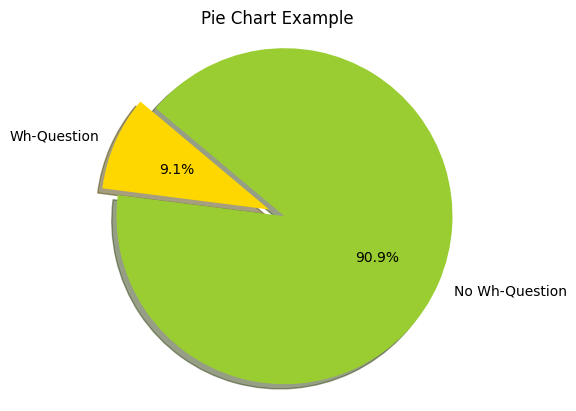

In [21]:
# Data to plot
labels = ['Wh-Question', 'No Wh-Question']
sizes = [count_whquestion, len(pre_seq)-count_whquestion]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Pie Chart Example')
plt.show()

In [22]:
# Vì vậy mình tiến hành loại bỏ các câu này, thì sẽ không gây ảnh hưởng gì trong việc xin ra nội dung câu.
wh_words = ['who', 'what', 'where', 'when', 'why', 'how', 'which']
pre_seq_no_w = []
for i in pre_seq:
    dem = 0
    for j in wh_words:
        if (j in i.lower()):
            dem = 1
            break
    if(dem==0):
        pre_seq_no_w.append(i)
len(pre_seq_no_w)

11226

In [23]:
# Check the number
def count_number_sequences(sequences):
    count = 0
    for text in sequences:
        # Use regular expressions to find all sequences of digits in the text
        numbers = re.findall(r'\d+', text)
        if(len(numbers)!=0):
            count+=1
    return count

In [24]:
count_number = count_number_sequences(pre_seq_no_w)

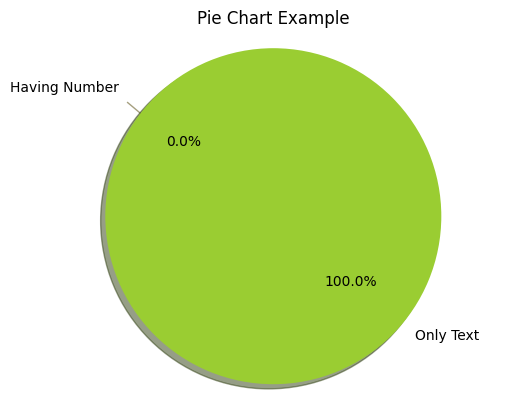

In [25]:
# Data to plot
labels = ['Having Number', 'Only Text']
sizes = [count_number, len(pre_seq_no_w)-count_number]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Pie Chart Example')
plt.show()

# Checking Word

In [26]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def is_valid_sequence(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Check if each token is a valid English word
    for token in tokens:
        if token.lower() not in word_list:
            return False
    return True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
dem = 0
for i in pre_seq_no_w:
    if not (is_valid_sequence(i)):
        dem+=1
print(dem)

10613


In [28]:
True_Sequence = []
for i in pre_seq_no_w:
    if (is_valid_sequence(i)):
        True_Sequence.append(i)

In [29]:
True_Sequence[:10]

['One important factor in retaining an atmosphere is the storminess of its star',
 'In order to accomplish this the entire detector must be chilled to',
 'One important factor in retaining an atmosphere is the storminess of its star',
 'Keep in mind that its possible its something else entirely',
 'A brief note Lastly to clarify dark energy is not the same as dark matter',
 'So the detection of planet TOI  c was a welcome departure',
 'They are so faint that their planetary population is largely unexplored',
 'Seeing the star let alone the planet is a feat in itself',
 'Not only might we learn about the potential for an atmosphere and about the surface mineralogy but it might also help us understand the stellar neighborhood and our place in it',
 'To imagine time dilation in action picture an object traveling towards a black hole']

In [30]:
len(pre_seq_no_w) - dem

613

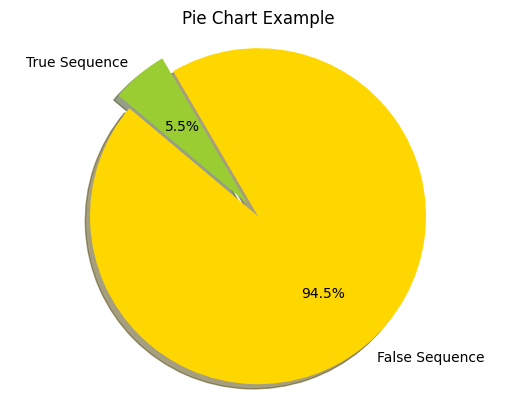

In [31]:
# Data to plot
labels = ['False Sequence', 'True Sequence']
sizes = [dem, len(pre_seq_no_w)-dem]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Pie Chart Example')
plt.show()

In [32]:
# dictionary of lists 
dict = {'text': pre_seq_no_w} 
   
df = pd.DataFrame(dict)
   
df.to_csv("Sequence_Text_temp.csv")

In [37]:
# dictionary of lists 
dict = {'text': pre_seq_no_w[1:1126]} 
   
df = pd.DataFrame(dict)
   
df.to_csv("Sequence_Text.csv")